## PyTorch Tutorial

As deep learning is really powerful when we have really huge data, the huge data is always means that over 100,000 samples in my previous job experience that you will be benifited with **deep learning**. So we could use deep learning to do so many things, which tools that I should use? In fact, I have used many libaries like **TensorFlow**, **Keras** in production, but as **PyTorch** is really popular, this tutorial is focused on **PyTorch**.

You should first install **PyTorch** first, just reference this link: [Install PyTorch](https://pytorch.org/get-started/locally/).

This tutorial will cover following materials:

* Basic PyTorch
* Auto Grad
* NN network
* CNN in PyTorch

### Basic PyTorch

In [1]:
# frist import torch module
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

One thing to notice that the reason that we use **PyTorch** is that this is really like **numpy** but could use **GPU** power, also we could do just like **numpy** module. The only difference is that for **PyTorch**, the core object is **Tensor**, just like **TensorFlow**'s Tensor. **Tensor** object could represent N-D matrix more powerful in GPU. You could just treat the **Tensor** as your training data!

In [2]:
# init empty matrix
x = torch.empty(2, 2)
x

tensor([[2.0615e-19, 4.8354e+30],
        [4.9640e+28, 1.3556e-19]])

In [3]:
# random matrix
x = torch.randn(3, 3)
x

tensor([[-0.8578, -0.6176, -0.2281],
        [-0.4034,  1.1562, -0.6602],
        [ 0.1885, -1.0944,  1.0578]])

In [4]:
# we could create another tensor shape like x, just like numpy does
y = torch.empty_like(x, dtype=torch.float)
y

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [5]:
# we could create 0 tensor
y = torch.zeros(2, 2)
y

tensor([[0., 0.],
        [0., 0.]])

In [6]:
# we could create tensor based on matrix
y = torch.Tensor([1, 2, 3])
y

tensor([1., 2., 3.])

In [7]:
# we could do compute operation just like numpy
y = torch.randn(3, 3)
print("x data:")
print(x)
print("y data:")
print(y)

x data:
tensor([[-0.8578, -0.6176, -0.2281],
        [-0.4034,  1.1562, -0.6602],
        [ 0.1885, -1.0944,  1.0578]])
y data:
tensor([[ 0.2000, -0.3080,  0.7717],
        [-0.0045, -2.2594, -0.3388],
        [-0.5783,  0.3670, -1.5884]])


In [8]:
# we could get the shape of tensor
print("shape of tensor:", x.size())
print("with shape for tensor:", x.shape)

shape of tensor: torch.Size([3, 3])
with shape for tensor: torch.Size([3, 3])


In [9]:
# we could do +, -, *, / operations
z = x + y
z

tensor([[-0.6577, -0.9256,  0.5436],
        [-0.4079, -1.1032, -0.9990],
        [-0.3898, -0.7275, -0.5307]])

In [10]:
# with* means element wise multiply
z = x * y
z

tensor([[-1.7158e-01,  1.9024e-01, -1.7602e-01],
        [ 1.8028e-03, -2.6124e+00,  2.2368e-01],
        [-1.0901e-01, -4.0163e-01, -1.6802e+00]])

In [11]:
# we could just change the value with _ operation
print("previous y:")
print(y)
y.add_(x)
print("new y:")
print(y)

previous y:
tensor([[ 0.2000, -0.3080,  0.7717],
        [-0.0045, -2.2594, -0.3388],
        [-0.5783,  0.3670, -1.5884]])
new y:
tensor([[-0.6577, -0.9256,  0.5436],
        [-0.4079, -1.1032, -0.9990],
        [-0.3898, -0.7275, -0.5307]])


In [12]:
# or we could just change with torch operation
print("pre Y:")
print(y)
torch.add(x, y, out=y)
print("new Y:")
print(y)

pre Y:
tensor([[-0.6577, -0.9256,  0.5436],
        [-0.4079, -1.1032, -0.9990],
        [-0.3898, -0.7275, -0.5307]])
new Y:
tensor([[-1.5155, -1.5432,  0.3155],
        [-0.8112,  0.0531, -1.6592],
        [-0.2014, -1.8219,  0.5271]])


In [13]:
# we could get data with slice as numpy.ndarray
print('X data:')
print(x)
print('silice:')
print(x[:, 0])

X data:
tensor([[-0.8578, -0.6176, -0.2281],
        [-0.4034,  1.1562, -0.6602],
        [ 0.1885, -1.0944,  1.0578]])
silice:
tensor([-0.8578, -0.4034,  0.1885])


In [14]:
# we could flatten our data
print(x.shape)
print("flatten: ", x.view(1, -1))
print(x.view(1, -1).shape)

torch.Size([3, 3])
flatten:  tensor([[-0.8578, -0.6176, -0.2281, -0.4034,  1.1562, -0.6602,  0.1885, -1.0944,
          1.0578]])
torch.Size([1, 9])


In [15]:
# we could just create one random variable
r = torch.randn(1)
r

tensor([-0.5961])

In [16]:
# we could create tensor based on numpy.ndarray
d = np.ones((2, 2))
print("Data:", d)

d_torch = torch.from_numpy(d)
print("Tensor: ", d_torch)

Data: [[1. 1.]
 [1. 1.]]
Tensor:  tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)


In [17]:
# we could get tensor to ndarray
d_array = d_torch.numpy()
d_array

array([[1., 1.],
       [1., 1.]])

### Auto Grad

The whole logic for deep learning is **Back propagation**, the logic of back propagation is really easy, as what we just want is to change the network parameters as weights and bias to better fit for data, so here is back propagation comes out. Back propagation is just based on the current model loss to change the weights and bias of model with gradient!

PyTorch just provides auto gradient based computation, without the math to get the computation funcion! That's why we use **PyTorch**! It will keep track with the whole variable that we want to keep track with gradient, for easy example, support you have a function with `y = x ** 2`, then you will get the gradient function with `grad_y = 2 * x`, PyTorch will help you without computing gradient function.

 If we want to keep track variable, just set variable with : `requires_grad=True`!

In [18]:
x = torch.randn(2, 2, requires_grad=True)

In [19]:
# with function computation
y = x * x
z = y.mean()

In [20]:
# we could get the gradient function
z.grad_fn

In [21]:
# we could compute the mean of data
z

tensor(0.2448, grad_fn=<MeanBackward0>)

In [22]:
# just call backward on the result scalar
z.backward(retain_graph=True)

In [23]:
# then we could get the gradient of input variable x
x.grad

tensor([[ 0.0161, -0.3714],
        [-0.0197, -0.3259]])

In [24]:
# in fact, we could also change not to track the gradient
with torch.no_grad():
    print((x * 2).requires_grad)

False


In [25]:
# or manually set that
x.requires_grad = False
x.requires_grad

False

### NN network

When we use **PyTorch**, what we want to do is to train a deep neural network, no matter for `Dense`, `CNN`, `RNN`, `LSTM`, etc. We could do both of whole these models!

But if you have learned deep learning with **Keras**, then you will find that with **PyTorch**, it is more code to make the model, we have to define the model class, with the whole thing step by step, with manually backward, but one thing is really important with **PyTorch** is that it is a dynamical computation graph, not like **TensorFlow** with static graph, means that with PyTorch, we could get the gradient of the trainable varaible right once!

In [26]:
# now we could create the model class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 =  nn.Linear(128, 3)
    
    def forward(self, x):
        x = x.float()   # as I get error when doing prediction, so here with changing x to float, solve it.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

In [27]:
# no that we have created the class, then we could instance the module object
network = Net()

# we could get the structure of our created model
network

Net(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [28]:
# here I should create our dataset, here I use iris datasets
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder

x, y = load_iris(return_X_y=True)

x_torch = torch.from_numpy(x)

### in fact, with so many failer time, that I found that Torch doesn't need the label to be one-hot! 
### must be integer with long type!!!

# # we have to convert the label to 2D
# y_one = y[:, np.newaxis]

# # we have to convert the integer label to onehot label
# y_one = OneHotEncoder().fit_transform(y_one).todense()

# print("We get data shape:", x.shape)
# print("We get label shape:", y_one.shape)

In [29]:
# now that we have the input and target, we could just first get model prediction
pred = network(x_torch)
# pred = torch.argmax(pred, axis=1)

# we could show first 10 rows of prediction
pred[:10]

tensor([[0.0000, 0.5777, 1.1117],
        [0.0000, 0.5620, 1.1007],
        [0.0000, 0.5320, 1.0369],
        [0.0000, 0.5314, 1.0624],
        [0.0000, 0.5666, 1.0866],
        [0.0000, 0.6139, 1.2172],
        [0.0000, 0.5209, 1.0321],
        [0.0000, 0.5723, 1.1183],
        [0.0000, 0.5060, 1.0172],
        [0.0000, 0.5680, 1.1100]], grad_fn=<SliceBackward>)

In [30]:
# create cross entropy loss object
criterion = nn.CrossEntropyLoss()

In [31]:
# we have to change the label to be long torch tensor!!!
y = torch.from_numpy(y)
y = y.type(torch.LongTensor)

In [32]:
# then we could get the cross entropy loss
loss = criterion(pred, y)
print("with loss: ", loss)

with loss:  tensor(1.1787, grad_fn=<NllLossBackward>)


In [33]:
# after we get the loss value, then we could backward step to get the gradient
# remove zero gradient
network.zero_grad()
loss.backward()

In [34]:
# we could check with the bias gradient
# so that you could see that with one backward step, the gradient of bais is not 0
# means we do find the gradient!
network.fc1.bias

Parameter containing:
tensor([ 0.0622,  0.1124,  0.0609, -0.4821,  0.4266, -0.4092,  0.3418, -0.1009,
        -0.1039, -0.2590, -0.1316,  0.4811, -0.4597,  0.1936,  0.4532, -0.3769,
         0.4155, -0.2490,  0.2086, -0.1432,  0.3488, -0.4409,  0.0885,  0.0302,
         0.1896, -0.0171, -0.0412,  0.1857,  0.1977,  0.2441,  0.1797,  0.2733,
         0.0830,  0.0541,  0.4985, -0.0462, -0.2447,  0.1547, -0.3999,  0.1758,
        -0.0660, -0.0808, -0.3470, -0.1462, -0.1865, -0.0264,  0.0938,  0.3955,
         0.1729,  0.0742,  0.1185,  0.1957, -0.1785, -0.3614,  0.2351, -0.3249,
        -0.4031, -0.0455, -0.1900,  0.3854,  0.0654,  0.1866,  0.3369, -0.1012,
        -0.2300, -0.4944,  0.4969, -0.4336, -0.0026, -0.1433,  0.3995,  0.3411,
         0.1313, -0.4142, -0.1110, -0.3877, -0.4689,  0.0282,  0.2934,  0.4019,
         0.1538,  0.4518, -0.4062,  0.2961,  0.3208, -0.0912, -0.1877,  0.2542,
        -0.4610, -0.0915, -0.4290,  0.1753, -0.2683, -0.3372,  0.3836,  0.1601,
         0.3169, -

In [35]:
# then we could do just simple update for whole trainable parameters with w := w - lr * grad_w
# but we have to set learning rate
learning_rate = .01

for f in network.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [41]:
# in fact, we could use so more advance optimizer to optimize out model
# here I also with many epochs(one epoch means model will see the whole training data!)
epochs = 100

# other optimizer could also been used! you should pass the model's parameters and the learning rate for that model
optimizer = optim.SGD(network.parameters(), lr=.01)

# as we have defined what optimizer to use, then we could start our training loop
for e in range(epochs):
    # remove the zero gradient
    optimizer.zero_grad()
    # now that we could get model predictiond
    pred = network(x_torch)
    # then compare the prediction and truth data
    loss = criterion(pred, y)
    # then we could do backward step
    loss.backward()
    # after getting the backward gradient, then we could do our optimizer step to update our parameters
    optimizer.step()
    if e % 5 == 0:
        print("Epoch: %d with loss: %.2f" % (e, loss))
        
# as you could see that we do make the loss to be lower by using the advanced optimizer! so great!

Epoch: 0 with loss: 0.81
Epoch: 5 with loss: 0.80
Epoch: 10 with loss: 0.80
Epoch: 15 with loss: 0.79
Epoch: 20 with loss: 0.78
Epoch: 25 with loss: 0.78
Epoch: 30 with loss: 0.77
Epoch: 35 with loss: 0.77
Epoch: 40 with loss: 0.76
Epoch: 45 with loss: 0.76
Epoch: 50 with loss: 0.75
Epoch: 55 with loss: 0.75
Epoch: 60 with loss: 0.74
Epoch: 65 with loss: 0.74
Epoch: 70 with loss: 0.73
Epoch: 75 with loss: 0.73
Epoch: 80 with loss: 0.72
Epoch: 85 with loss: 0.72
Epoch: 90 with loss: 0.72
Epoch: 95 with loss: 0.71


data shape: (1797, 64)
label unique: [0 1 2 3 4 5 6 7 8 9]
model strcture: NetDense(
  (fc1): Linear(in_features=64, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


C:\Users\Public\anaconda\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch : 0 with training loss: 2.31, with testing loss: 2.25
Epoch : 10 with training loss: 2.10, with testing loss: 2.09
Epoch : 20 with training loss: 1.95, with testing loss: 2.00
Epoch : 30 with training loss: 1.86, with testing loss: 1.87
Epoch : 40 with training loss: 1.82, with testing loss: 1.85
Epoch : 50 with training loss: 1.81, with testing loss: 1.85
Epoch : 60 with training loss: 1.81, with testing loss: 1.84
Epoch : 70 with training loss: 1.80, with testing loss: 1.84
Epoch : 80 with training loss: 1.80, with testing loss: 1.84
Epoch : 90 with training loss: 1.80, with testing loss: 1.84
train accuracy:  0.6965901183020181
test accuracy:  0.6472222222222223


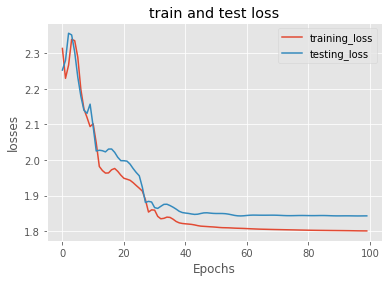

In [82]:
# one more thing, as you train the deep learning models, you should focus on the training accuracy
# and evaluate the model based on the test data to plot the training accuracy and test loss curve
# to find out whether our model is overfitting or underfitting (really important for evaluate the generalization of model!)

# here I just create a whole new class for classification problem for sklearn digits problems(0 - 9 numbers)
# also with train and test data to evaluate model in one cell
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style

# want to plot a beautiful graph
style.use('ggplot')

# ----------------------------
# 1. load data and make data to pytorch tensor
# ----------------------------

x, y = load_digits(return_X_y=True)
print("data shape:", x.shape)
print("label unique:", np.unique(y))

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=1234)

# convert numpy ndarray to PyTorch tensor
xtrain = torch.from_numpy(xtrain)
ytrain = torch.from_numpy(ytrain)
ytrain = ytrain.type(torch.LongTensor)    # change the label to long type

xtest = torch.from_numpy(xtest)
ytest = torch.from_numpy(ytest)
ytest = ytest.type(torch.LongTensor)    # change the label to long type

# ------------------------
# 2. create model class and instance model
# ------------------------

# create a new module with feedwark network as just with dense layers
# this is how many units in each layer! this is really important! you could try different units, really will affact the result!
hidden_units = 512   

class NetDense(nn.Module):
    def __init__(self):
        super(NetDense, self).__init__()
        self.fc1 = nn.Linear(x.shape[1], hidden_units)
        self.fc2 = nn.Linear(hidden_units, len(np.unique(y)))
        
    def forward(self, x):
        x = x.float()    # change data types
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))    # this will return the logits result
        x = F.softmax(x)   # this will change the model logits sum to 1 with softmax function
        return x     # you have to return the result! as the model call forward step, we have to get the result from the model

# as we have created out model, first should create our model object
model = NetDense()
# show our model
print("model strcture:", model)

# ---------------------
# 3. instance the optimizer and evaluation object
# ---------------------

#so here we could choose our opimitimizer, as the adam optimizer is an advance method 
# to change its' learning rate dynamic
# but I set the learning rate too high, then the loss doesn't go down! 
# so you should try with the best learning rate using cross-validation!
optimizer = optim.Adam(model.parameters(), lr=.005)     
# optimizer = optim.SGD(model.parameters(), lr=.01)

# what criterian that we should use for evaluating our model
# as we are doing multi-class problem, we should use cross-entropy = - sum(y * log(y))
criterion = nn.CrossEntropyLoss()

# how many epochs that we want the model to see
epochs = 100

train_loss_list = []
test_loss_list = []

p = model(xtrain)

# ----------------------
# 4. start training and get the loss for both train and test data
# ----------------------

# then we could start our training loop
for e in range(epochs):
    # get prediction of our model based on the training data
    pred_train = model(xtrain)
    # get loss
    loss_train = criterion(pred_train, ytrain)
    train_loss_list.append(loss_train)
    
    # after we get our training loss, then we could do backward step to compute our loss
    optimizer.zero_grad()
    loss_train.backward()
    
    # after we have get our training loss, then we could update our model parameters 
    # according to our training loss 
    optimizer.step()
    
    # then we should evaluate our trained model for test data
    pred_test = model(xtest)
    loss_test = criterion(pred_test, ytest)
    test_loss_list.append(loss_test)
    
    if e % 10 == 0:
        print("Epoch : %d with training loss: %.2f, with testing loss: %.2f" % (e, loss_train, loss_test))
        
# --------------------
# 5. get model train accuracy and test accuracy
# --------------------

# after the model has been trained, 
# so we want to evaluate the model accuracy on both the train and test data
pred_train = model(xtrain)
pred_test = model(xtest)
# you have to remember that for train and test prediction is probability, 
# we have to change the proba to classes and we want to use numpy to compute accuracy
pred_train = torch.argmax(pred_train, axis=1)
pred_test = torch.argmax(pred_test, axis=1)

print("train accuracy: ", torch.sum(pred_train == ytrain).numpy() / ytrain.size()[0])
print("test accuracy: ", torch.sum(pred_test == ytest).numpy() / ytest.size()[0])

# ------------------
# 6. plot the training and testing loss curve
# ------------------

# after the training step finished, then we could plot the training loss and testing loss in one graph, 
# so that we could figure out what is going on during the training step
plt.plot(range(len(train_loss_list)), train_loss_list, label='training_loss')
plt.plot(range(len(test_loss_list)), test_loss_list, label='testing_loss')

plt.title('train and test loss')
plt.xlabel("Epochs")
plt.ylabel('losses')

plt.legend()
plt.show()

As you could see that we do train our model learning something in the training data, but you could see that for both training and test data is really low, but we could use more advanced algorithms that could fix this problem better!

But the important thing is to figure out how to solve the problem!

### CNN in PyTorch

As deep learning is famous in image, voice, natural language or something else, so here I just to show use case for CNN module for Image, like if you want to classify an image is a cat or dog, this is called: `Classification` problem.

As PyTorch provides computer vision module called `torchvision` to load data, process data and some useful transformation steps, so here just use `torchvision` module. There are many predefined useful funcationality in `torchvision`, we will step by step.

In [83]:
import torchvision
import torchvision.transforms as transforms

In [86]:
# here we will download the CIFAR 10 examples, there are 10 classes images
# I will show you later, as the data download is from 0 to 1, but we need to make the data to -1 to 1
# so we should first define the transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((.5, .5, .5), (.5, .5, .5))])

# then we should download data and load data
traindata = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testdata = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(traindata, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testdata, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


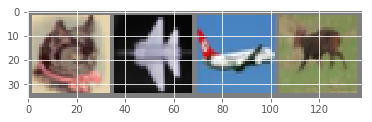

       cat       plane       plane        deer 


In [92]:
# then we could plot some data samples to show
def imshow(image):
    image = image / 2 + .5   # unnormalize the data
    image = image.numpy()   # convert tensor to numpy ndarray
    plt.imshow(np.transpose(image, (1, 2, 0)))
    plt.show()

# we could iterate data 
data_rand = iter(trainloader)
images, labels = data_rand.next()   # as we set the batch_size to 4, so here for both images and labels are 4 records

show_images = torchvision.utils.make_grid(images)

imshow(show_images)

# get the label
print(" ".join("%10s " % (classes[labels[j]]) for j in range(4)))

# as the images really contain some objects

In [98]:
# -------------------
# here we should create a class to process the image
# -------------------
class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        # Conv2d: 3 means input channels (as we have 3 D data); 6 means kernals number; 5 means kernel size
        # so this is just means how many channels we have, how many kernels that you use and how big the kernel.
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten the data
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x

model = CNNNet()
print("Model: ", model)

# ---------------------
# start training 
# ---------------------

# then we should define our optimizer, also with momentum for faster training
optimizer = optim.SGD(model.parameters(), lr=.002, momentum=.9)
# also define the criterion that we should take, as this is multi-class problem, so we should use cross-entropy
criterion = nn.CrossEntropyLoss()

# after we have defined the whole things, then we could start our training step
epochs = 3
for e in range(epochs):
    # whole loss for each epoch
    running_loss = .0
    for i, data in enumerate(trainloader):
        # means that we will make our model with each image and update the weights!
        # one time one image
        input_data, label = data
        
        # we should remove the zero gradient
        optimizer.zero_grad()
        
        # we could get the prediction
        pred_train = model(input_data)
        # as we get the prediction, we should get the loss
        loss_train = criterion(pred_train, label)
        # backward step
        loss_train.backward()
        # update the model parameters
        optimizer.step()
        
        # then we should add the current image loss with total loss
        running_loss += loss_train.item()
        
        # print loss
        if i % 2000 == 0:
            print("[Epochs: %d, %d samples] with this epoch loss: %.2f" % (e + 1, i, running_loss / 2000))
            running_loss = .0

print("whole training step finished!")

Model:  CNNNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


C:\Users\Public\anaconda\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[Epochs: 1, 0 samples] with this epoch loss: 0.00
[Epochs: 1, 2000 samples] with this epoch loss: 2.30
[Epochs: 1, 4000 samples] with this epoch loss: 2.30
[Epochs: 1, 6000 samples] with this epoch loss: 2.30
[Epochs: 1, 8000 samples] with this epoch loss: 2.23
[Epochs: 1, 10000 samples] with this epoch loss: 2.17
[Epochs: 1, 12000 samples] with this epoch loss: 2.14
[Epochs: 2, 0 samples] with this epoch loss: 0.00
[Epochs: 2, 2000 samples] with this epoch loss: 2.11
[Epochs: 2, 4000 samples] with this epoch loss: 2.09
[Epochs: 2, 6000 samples] with this epoch loss: 2.07
[Epochs: 2, 8000 samples] with this epoch loss: 2.07
[Epochs: 2, 10000 samples] with this epoch loss: 2.06
[Epochs: 2, 12000 samples] with this epoch loss: 2.05
[Epochs: 3, 0 samples] with this epoch loss: 0.00
[Epochs: 3, 2000 samples] with this epoch loss: 2.04
[Epochs: 3, 4000 samples] with this epoch loss: 2.05
[Epochs: 3, 6000 samples] with this epoch loss: 2.05
[Epochs: 3, 8000 samples] with this epoch loss: 2.0

##### Noticed thing
As you could see that during the 2 epochs, the model's loss is continously descreas, but the model will make more wrong choice for 3th epoch, what does this means? The whole training is based on train data, but why the training loss will go high?

One thing should be noticed that each time to process the data, we will shuffle our data! but this shouldn't be the reason why our model go wrong than before. I guess that this is because of the our model's capacity is really small that we couldn't learn the whole inherent logic in our training data, if possible we should add more kernles.

In [107]:
# as we have trained our model, so here we should get our test data accuracy based on our trained model
total_test = 0
correct_pred_test = 0

# as we don't need to change the model's parameters, so we should change the model parameters with no_grad
with torch.no_grad():
    # then we could iterater the whole test dataset
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, pred = torch.max(outputs.data, 1)    # get the prediction
        total_test += labels.size()[0]
        correct_pred_test += (pred == labels).sum().item()  # this should based on the bach label, as prediction will be 4D
        
# here I also want to know how good model perform on train data
total_train = 0
correct_pred_train = 0

with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = model(images)
        _, pred = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_pred_train += (pred == labels).sum().item()

print("Train data accuracy: %.2f %s" % ((correct_pred_train / total_train) * 100, "%"))
print("Test data accuracy: %.2f %s" % ((correct_pred_test / total_test) * 100, "%"))

# as you could see that you just get 40% accuracy on test data, not good, 
# you should tune the model parameters as you want
# But how could this happen? both train accuracy and test accuracy same with each other?

C:\Users\Public\anaconda\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Train data accuracy: 40.06 %
Test data accuracy: 40.06 %


### Final words

This is the end of **PyTorch** tutorial, I think I will write more implements for both basic model structures and deep learning model structure implement with **PyTorch**, as I would also write tutorials for **TensorFlow**, so please keep patient, I will try my best to implement more things with deep learning modules.

**Practice will be the only way to learn things!**